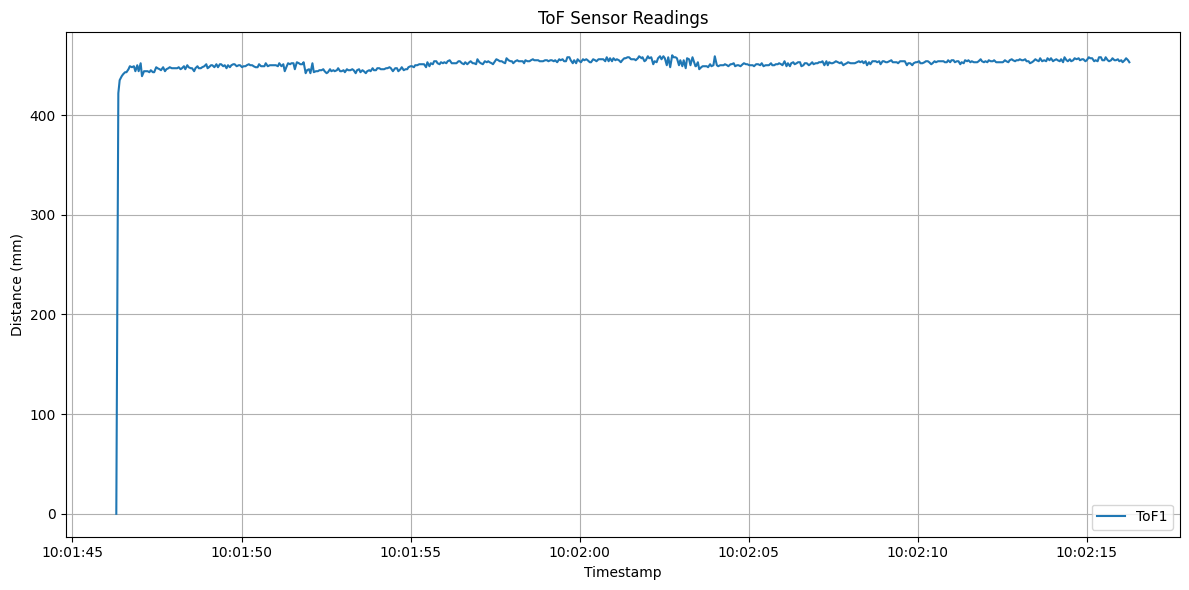

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("d:/robomaster/abnormal_tof_30.csv")

# แปลง timestamp เป็น datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# แปลงค่า ToF จาก mm เป็น cm
for col in ['tof1', 'tof2', 'tof3', 'tof4']:
    df[col] = df[col] / 10.0

# Plot กราฟ ToF ทั้ง 4 ตัว (หน่วย cm)
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['tof1'], label='ToF1')
plt.xlabel('Timestamp')
plt.ylabel('Distance (cm)')
plt.title('ToF Sensor Readings (cm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(bottom=0)
plt.show()

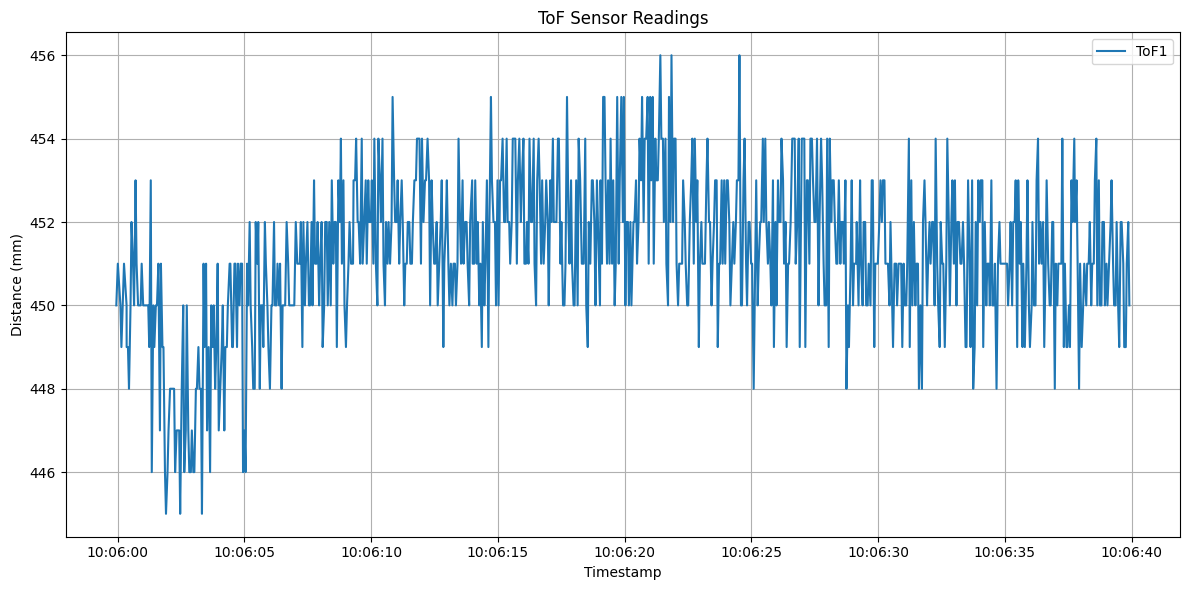

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("d:/robomaster/abnormal_tof_2.csv")

# แปลง timestamp เป็น datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot กราฟ ToF ทั้ง 4 ตัว
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['tof1'], label='ToF1')
plt.xlabel('Timestamp')
plt.ylabel('Distance (mm)')
plt.title('ToF Sensor Readings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

40cm

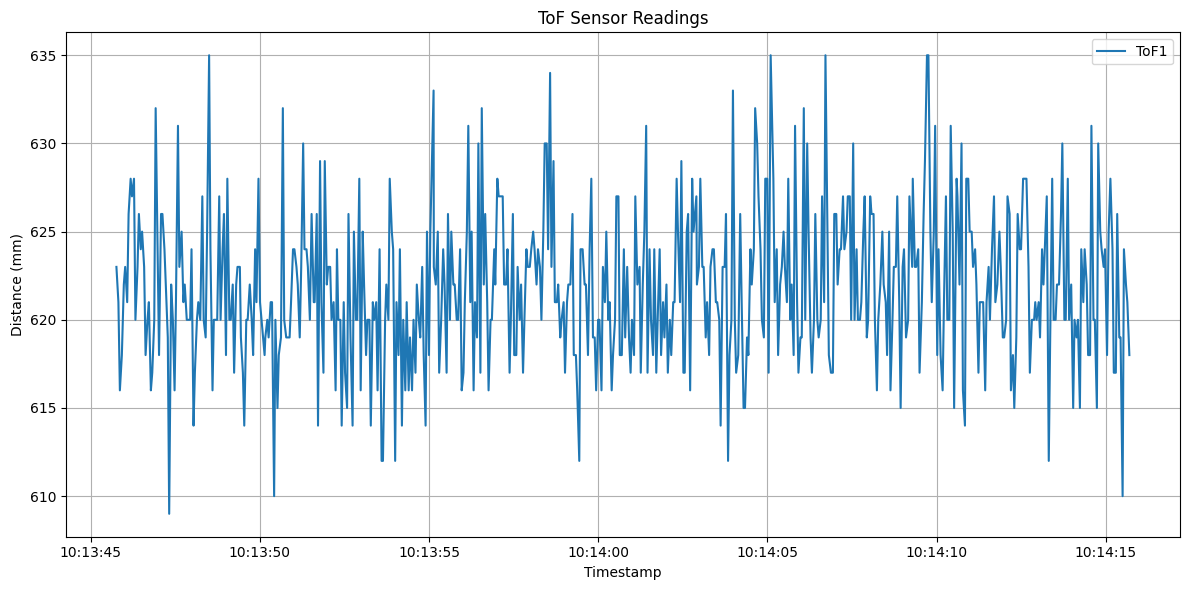

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("d:/robomaster/abnormal_tof_40.csv")

# แปลง timestamp เป็น datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot กราฟ ToF ทั้ง 4 ตัว
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['tof1'], label='ToF1')
plt.xlabel('Timestamp')
plt.ylabel('Distance (mm)')
plt.title('ToF Sensor Readings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()